# 回归问题举例，使用 backward() 反向传播自动求导，并手动更新参数

1）先来造一批数据，作为样本数据 x 和 标签值y

torch.Size([100])
torch.Size([100, 1])
torch.Size([100, 1])


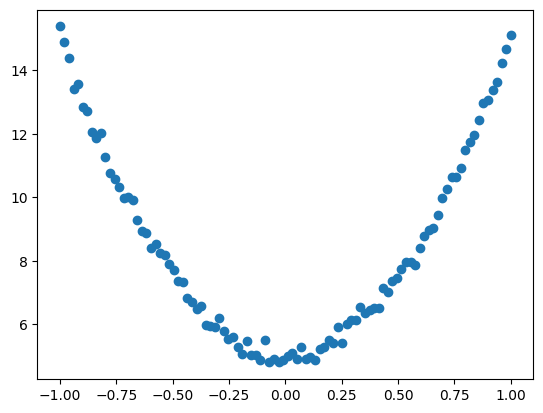

In [6]:
import torch
from matplotlib import pyplot as plt

torch.manual_seed(42)

x = torch.linspace(-1, 1, 100)
print(x.size())
x = x.unsqueeze(1)
print(x.size())

y = 10 * x.pow(2) + 5 + 0.2 * torch.randn(x.size())
print(y.size())

plt.scatter(x.numpy(), y.numpy())
plt.show()

2）定义一个模型 y = wx +b, 我们要学习出 w 和 b 的值，用来拟合 x 和 y

tensor([[-1.6270]], requires_grad=True)
tensor([[-1.3951]], requires_grad=True)


100%|██████████| 20000/20000 [00:01 elapsed]


tensor([[10.0112]], requires_grad=True)
tensor([[5.0081]], requires_grad=True)
tensor(3.8516, grad_fn=<SumBackward0>)


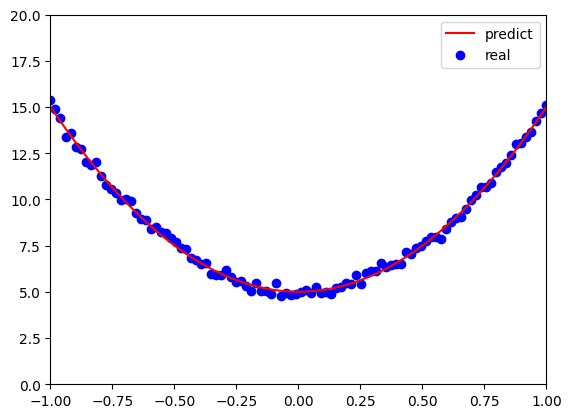

In [11]:
w = torch.randn(1, 1, dtype=torch.float, requires_grad=True)
b = torch.randn(1, 1, dtype=torch.float, requires_grad=True)
print(w)
print(b)

lr = 0.001

from tqdm import tqdm

# 设置进度条的格式字符串
bar_format = "{desc}: {percentage:.0f}%|{bar}| {n_fmt}/{total_fmt} [{elapsed} elapsed]"
epochs = 20000  # 200

for i in tqdm(range(epochs), total=epochs, bar_format=bar_format):
    # forward construct graph
    y_pred = w * x.pow(2) + b

    loss = (y - y_pred) ** 2
    loss = loss.sum()

    # if i % 50 == 0:
    #     print(f"epoch: {i}, loss: {loss.sum()}")

    # backward calc grad
    loss.backward()

    # update
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

        w.grad.zero_()
        b.grad.zero_()

print(w)
print(b)
print(loss)

y_pred = w * x.pow(2) + b
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='predict')
plt.scatter(x.numpy(), y.numpy(), c='b', marker='o', label='real')
plt.xlim(-1, 1)
plt.ylim(0, 20)
plt.legend()
plt.show()

In [12]:
import logging


def colorstr(*input):
    """
    Colors a string using ANSI escape codes, e.g., colorstr('blue', 'hello world').
    See https://en.wikipedia.org/wiki/ANSI_escape_code.
    """
    *args, string = input if len(input) > 1 else ("blue", "bold", input[0])  # color arguments, string
    colors = {
        "black": "\033[30m",  # basic colors
        "red": "\033[31m",
        "green": "\033[32m",
        "yellow": "\033[33m",
        "blue": "\033[34m",
        "magenta": "\033[35m",
        "cyan": "\033[36m",
        "white": "\033[37m",
        "bright_black": "\033[90m",  # bright colors
        "bright_red": "\033[91m",
        "bright_green": "\033[92m",
        "bright_yellow": "\033[93m",
        "bright_blue": "\033[94m",
        "bright_magenta": "\033[95m",
        "bright_cyan": "\033[96m",
        "bright_white": "\033[97m",
        "end": "\033[0m",  # misc
        "bold": "\033[1m",
        "underline": "\033[4m",
    }
    return "".join(colors[x] for x in args) + f"{string}" + colors["end"]


logging.basicConfig(level=logging.INFO)
logging.info(colorstr('调试日志'))
logging.info(colorstr('bright_yellow', '调试日志'))
logging.info(colorstr('underline', 'cyan', '调试日志'))

INFO:root:调试日志
INFO:root:调试日志
INFO:root:调试日志
